In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pickle
import os

In [9]:
fish_length = np.array([25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
            31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
            35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
            10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0])

fish_weight = np.array([242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
            500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9])

In [3]:
fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=3)

In [4]:
with open("knn_model.pkl", "wb") as f:
        pickle.dump(kn, f)

In [5]:
len(fish_length)

49

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

train_input, test_input, train_target, test_target = train_test_split(fish_length, fish_weight, test_size=0.2, random_state=42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [14]:
train_poly = np.column_stack((train_input ** 2, train_input))

In [15]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [16]:
with open("lr_model.pkl", "wb") as f:
        pickle.dump(lr, f)

In [17]:
train_poly

array([[ 992.25,   31.5 ],
       [ 841.  ,   29.  ],
       [1681.  ,   41.  ],
       [ 900.  ,   30.  ],
       [ 841.  ,   29.  ],
       [ 882.09,   29.7 ],
       [ 127.69,   11.3 ],
       [ 139.24,   11.8 ],
       [ 169.  ,   13.  ],
       [1024.  ,   32.  ],
       [ 942.49,   30.7 ],
       [1089.  ,   33.  ],
       [1225.  ,   35.  ],
       [1681.  ,   41.  ],
       [1482.25,   38.5 ],
       [ 645.16,   25.4 ],
       [ 144.  ,   12.  ],
       [1560.25,   39.5 ],
       [ 882.09,   29.7 ],
       [1369.  ,   37.  ],
       [ 961.  ,   31.  ],
       [ 110.25,   10.5 ],
       [ 691.69,   26.3 ],
       [1156.  ,   34.  ],
       [ 702.25,   26.5 ],
       [ 112.36,   10.6 ],
       [  96.04,    9.8 ],
       [1225.  ,   35.  ],
       [ 125.44,   11.2 ],
       [ 961.  ,   31.  ],
       [1190.25,   34.5 ],
       [1122.25,   33.5 ],
       [ 225.  ,   15.  ],
       [1156.  ,   34.  ],
       [ 900.  ,   30.  ],
       [ 139.24,   11.8 ],
       [1024.  ,   32.  ],
 

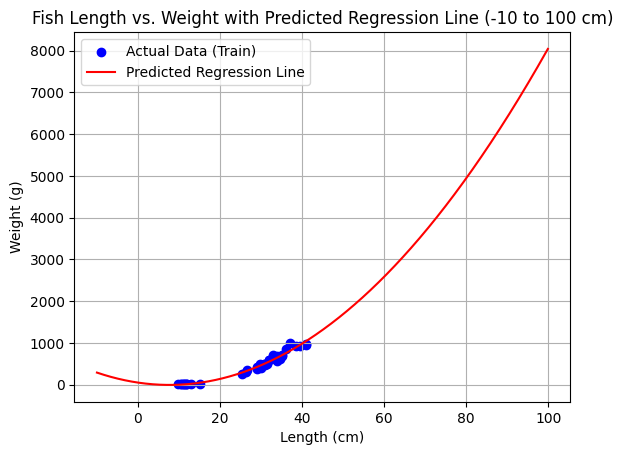

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# -10에서 100까지의 길이 범위를 설정
length_range = np.arange(-10, 100, 0.1).reshape(-1, 1)

# 제곱 항 포함한 길이 입력 데이터 생성
length_range_poly = np.column_stack((length_range ** 2, length_range))

# 예측값 계산
predicted_weight = lr.predict(length_range_poly)

# 원본 데이터 (훈련 데이터) 산포도 그리기
plt.scatter(train_input, train_target, label='Actual Data (Train)', color='blue')

# -10에서 100까지의 회귀 곡선 그리기
plt.plot(length_range, predicted_weight, label='Predicted Regression Line', color='red')

# 그래프 꾸미기
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.title('Fish Length vs. Weight with Predicted Regression Line (-10 to 100 cm)')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
lr.predict([[25, 5]])

array([-0.95057886])